# import dependancy

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D,Dropout
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from matplotlib import  pyplot as plt
from keras.callbacks import EarlyStopping

# import MNIST dataset

In [2]:
(x_train,y_train), (x_test, y_test)  = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train[:5])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 1 9]


In [4]:
img_raw  = x_train[0].shape[0]
img_col  = x_train[0].shape[1]
print(img_raw)
print(img_col)

28
28


In [5]:
x_train = x_train.reshape(x_train.shape[0], img_raw, img_col,1)
x_test = x_test.reshape(x_test.shape[0], img_raw, img_col,1)

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
x_train = x_train

In [7]:
def plotImages(img_arr):
    for img in img_arr:
        plt.tight_layout()
        plt.imshow(img)
        plt.show()
        

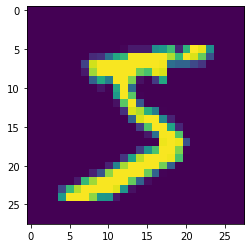

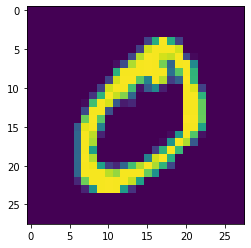

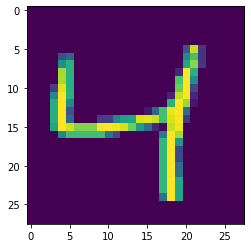

In [8]:
plotImages(x_train[:3])

In [9]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation="relu", padding="same", input_shape =(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(32, (5,5), activation="relu", padding="same"))

model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Flatten())

model.add(Dense(1024, activation="relu"))

model.add(Dropout(0.4))

model.add(Dense(10))



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

# Compile the  Neural Network

In [11]:
model.compile(optimizer=Adam(),
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["sparse_categorical_accuracy"])

# Train the Neural Network

In [12]:
batch_size = 200
epochs = 100
step_per_epochs = 54000//batch_size
validation_steps  = 6000// batch_size

In [13]:
early_stopping = EarlyStopping(monitor="val_loss",
                              patience=15,
                              restore_best_weights=True)

model_history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, 
                          steps_per_epoch = step_per_epochs, validation_split=0.1,
                          validation_steps=validation_steps, callbacks = [early_stopping]) 

Epoch 1/100
270/270 [==============================] - 7s 12ms/step - loss: 1.3093 - sparse_categorical_accuracy: 0.8734 - val_loss: 0.1010 - val_sparse_categorical_accuracy: 0.9687
Epoch 2/100
270/270 [==============================] - 3s 11ms/step - loss: 0.1077 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0740 - val_sparse_categorical_accuracy: 0.9778
Epoch 3/100
270/270 [==============================] - 5s 17ms/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.0596 - val_sparse_categorical_accuracy: 0.9825
Epoch 4/100
270/270 [==============================] - 4s 15ms/step - loss: 0.0558 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0547 - val_sparse_categorical_accuracy: 0.9842
Epoch 5/100
270/270 [==============================] - 4s 15ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0609 - val_sparse_categorical_accuracy: 0.9850
Epoch 6/100
270/270 [==============================] - 5s 18ms/step - loss: 0.0383 - spars

# Plot the accuracy of the model during training

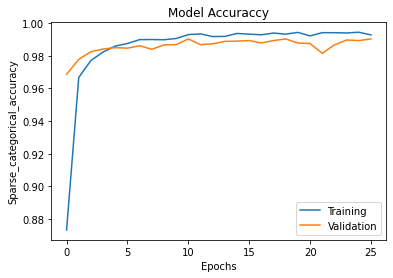

In [20]:
plt.plot(model_history.history["sparse_categorical_accuracy"])
plt.plot(model_history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuraccy")
plt.ylabel("Sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.legend(["Training", "Validation"], loc= "lower right")
plt.show()

# Plot the loss of the model during training

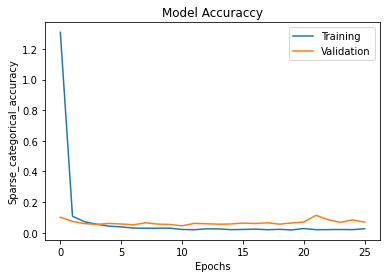

In [22]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model Accuraccy")
plt.ylabel("Sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.legend(["Training", "Validation"], loc= "upper right")
plt.show()

# Evaluate the best model with testing data

In [23]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0486 - sparse_categorical_accuracy: 0.9866
[0.04855047166347504, 0.9865999817848206]


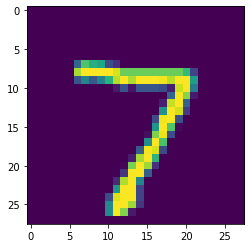

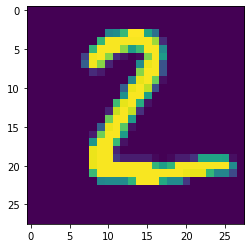

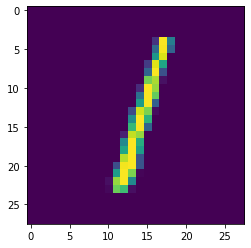

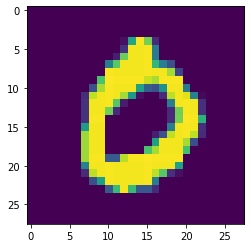

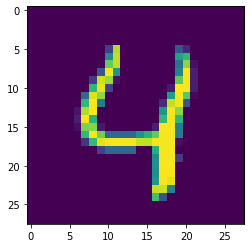

In [24]:
plotImages(x_test[:5])

In [25]:
predictions = np.argmax(model.predict(x_test[:10]), axis=1)
print(predictions)

[7 2 1 0 4 1 4 9 5 9]


In [26]:
# model.save("models/acc_986_loss_048.h5")